# 1.資料清理與視覺化圖表
### (1)清理遺漏值:

* 匯入所需函式庫

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* 匯入資料並檢查有無遺漏值

In [2]:
#偵測遺漏值
df = pd.read_csv('HW2_heart.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

結果顯示此資料集並無遺漏值

### (2)視覺化圖表
#####  A.利用直方圖顯示各區間靜止血壓人數

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


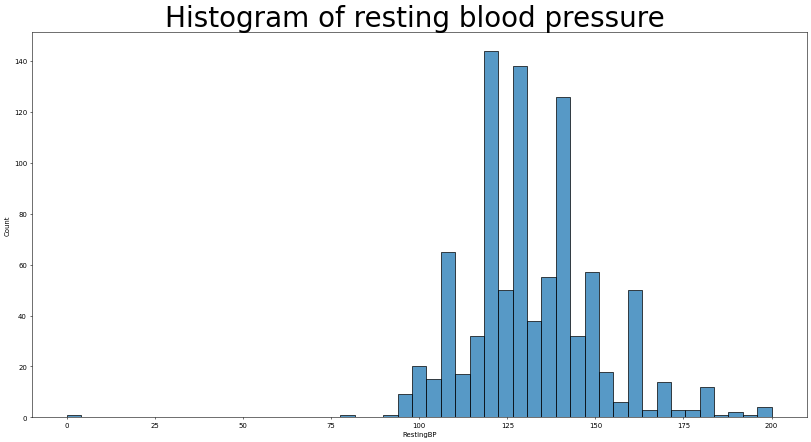

In [3]:
#畫出初始資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.RestingBP)
plt.title("Histogram of resting blood pressure ",fontsize=40)
plt.show()

從上方圖可觀察出此數據有一些極度偏離正常值的數據
因此我們可以嘗試用四分位數區間來將那些離群值剃除於數據外

##### B.刪除離群值並觀察直方圖
為了一些極端資料及雜訊影響模型的擬合後效能，因此在此階段我們要先將這些資料移除<br>
首先要先檢查離群值是否存在:

In [4]:
#建立尋找離群值之函式
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['RestingBP'])[0]
df.take(idx)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1


檢查後發現離群值確實存在<br>
接下來便需要將這些離群值移除

In [5]:
#找出離群值的row
idx = outlier_idx(df['RestingBP'])[0]
#移除離群值
df=df.drop(idx)
#顯示移除後的資料
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

在移除離群值後再次觀察此數據的直方圖:

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


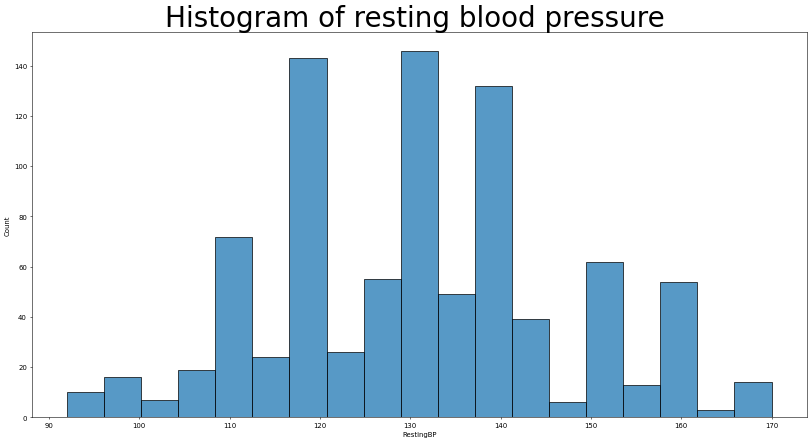

In [6]:
#畫出移除離群值後資料的直方圖
plt.figure(figsize=(20,10),dpi=50)
sns.histplot(df.RestingBP)
plt.title("Histogram of resting blood pressure ",fontsize=40)
plt.show()

由此圖可觀察到數據更為集中其中極為極端的樹直接從數據中被移除，並且數值跨度也小了許多，應能對後續模型建立起到幫助

# 2.敘述性統計分析
透過敘述性統計分析來了解數據所具有之特性，其中包含平均數、標準差、變異數、最大/最小值等，以下為計算結果:

In [7]:
# 計算平均值
print('RestingBP平均值：', df['RestingBP'].mean())
# 計算中位數
print('RestingBP中位數：', df['RestingBP'].median())
# 計算變異數、標準差
print('RestingBP變異數：', df['RestingBP'].var())
print('RestingBP標準差：', df['RestingBP'].std())
# 計算最大值，最小值與全距(range)
print('RestingBP最大值：', df['RestingBP'].max())
print('RestingBP最小值：', df['RestingBP'].min())
print('RestingBP全距：', df['RestingBP'].max()-df['RestingBP'].min())


df.describe() #顯示所有特徵的數據分析

RestingBP平均值： 131.1134831460674
RestingBP中位數： 130.0
RestingBP變異數： 250.89711833773634
RestingBP標準差： 15.83973226849925
RestingBP最大值： 170
RestingBP最小值： 92
RestingBP全距： 78


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,53.412360,131.113483,198.843820,0.230337,136.928090,0.878989,0.550562
std,9.499847,15.839732,108.627977,0.421285,25.358962,1.061165,0.497717
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,265.750000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,6.200000,1.000000


靜止血壓之總平均值為131.113，中位數為130，平均數較中位數略高，表示血壓的數據分布略為右偏<br>
以下用RestingBP來繪製四分位箱型圖:

{'whiskers': [<matplotlib.lines.Line2D at 0x281ccd35e90>,
 'caps': [<matplotlib.lines.Line2D at 0x281ccd37250>,
 'boxes': [<matplotlib.lines.Line2D at 0x281ccd35790>],
 'medians': [<matplotlib.lines.Line2D at 0x281ccd3c350>],
 'fliers': [<matplotlib.lines.Line2D at 0x281ccd3cc90>],
 'means': []}

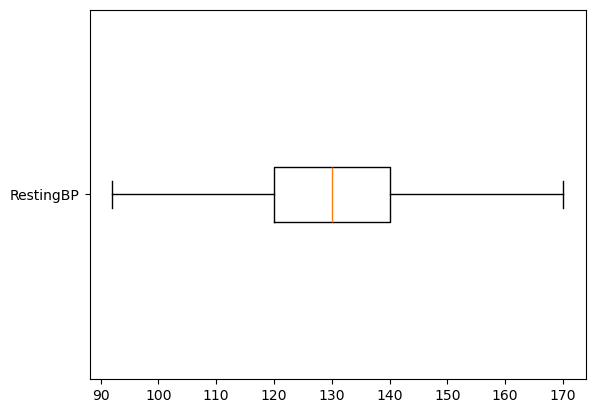

In [8]:
data = df['RestingBP'].tolist() # 取得 'price' 列的數據，並轉換為列表格式
plt.boxplot(data, labels=['RestingBP'], vert=False) # 繪製相形圖

此箱型圖落於90~170間，並且可觀察到大多數值都聚集於120~140間，並沒有明顯正偏的現象，且並沒有存在離群值

# 3.特徵相關性分析
### (1)相關係數熱度圖
接下來透過相關係數熱度突來觀察各特徵間的相關性，並可利用相關性較高的數值來進行線性回歸，以下式相關係數熱度圖的實作:

在進行相關係數熱度圖前先將某些特徵轉為數值型:

In [9]:
# 將非數值數據轉換為數值
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df['FastingBS'] = df['FastingBS'].map({0: 0, 1: 1})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# 輸出轉換後的數據框
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              1        140          289          0           0   
1   49    1              2        160          180          0           0   
2   37    0              1        130          283          0           1   
3   48    1              3        138          214          0           0   
4   54    0              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'ChestPainType'),
 Text(3.5, 0, 'RestingBP'),
 Text(4.5, 0, 'Cholesterol'),
 Text(5.5, 0, 'FastingBS'),
 Text(6.5, 0, 'RestingECG'),
 Text(7.5, 0, 'MaxHR'),
 Text(8.5, 0, 'ExerciseAngina'),
 Text(9.5, 0, 'Oldpeak'),
 Text(10.5, 0, 'ST_Slope'),
 Text(11.5, 0, 'HeartDisease')]

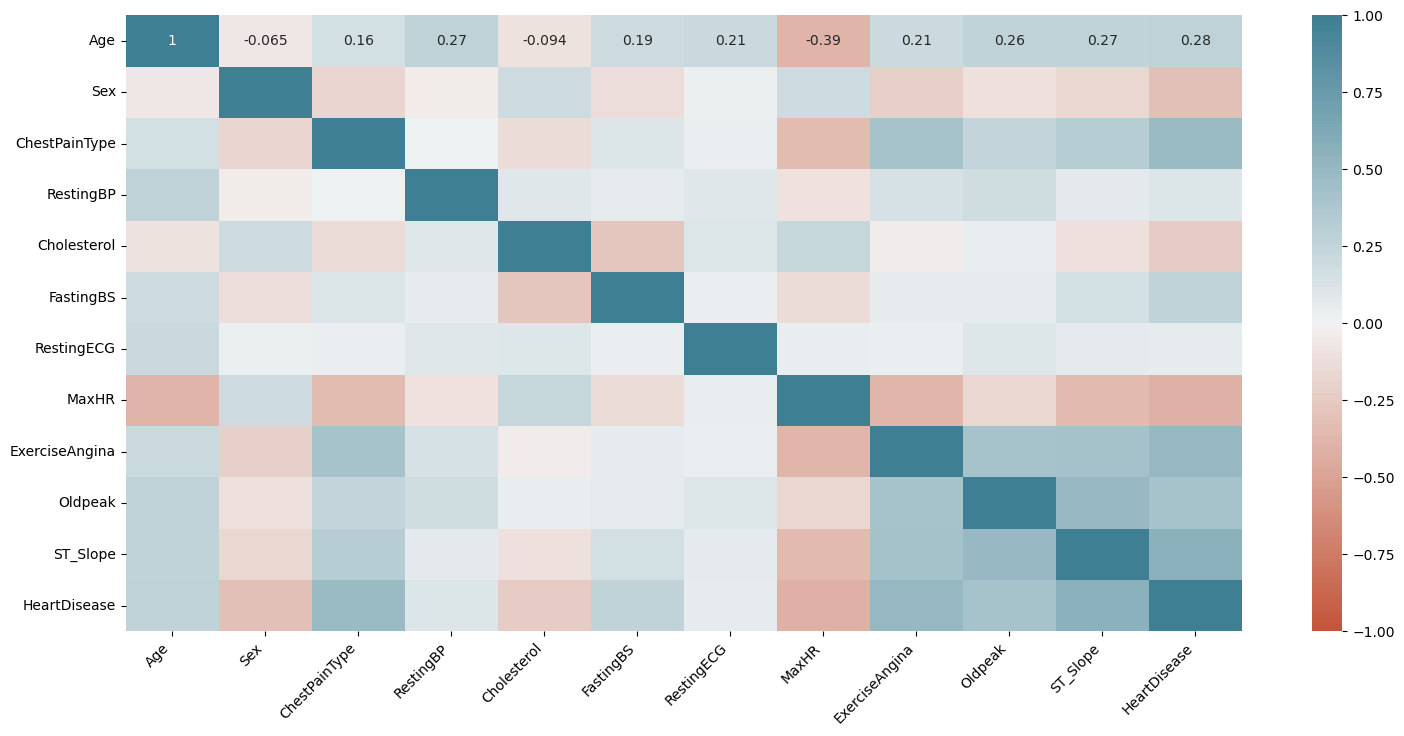

In [12]:
corr = df.loc[:, :].corr()
plt.subplots(figsize=(18, 8))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


由上面圖表可觀察到age與oldpeak有較大的關聯性，這兩個特徵與RestingBP呈高度正相關，但因Oldpeak為非連續性數值組成，因而決定使用age來建立簡單的線性回歸

### (2)散點圖矩陣分析 

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Figure size 2000x1000 with 0 Axes>

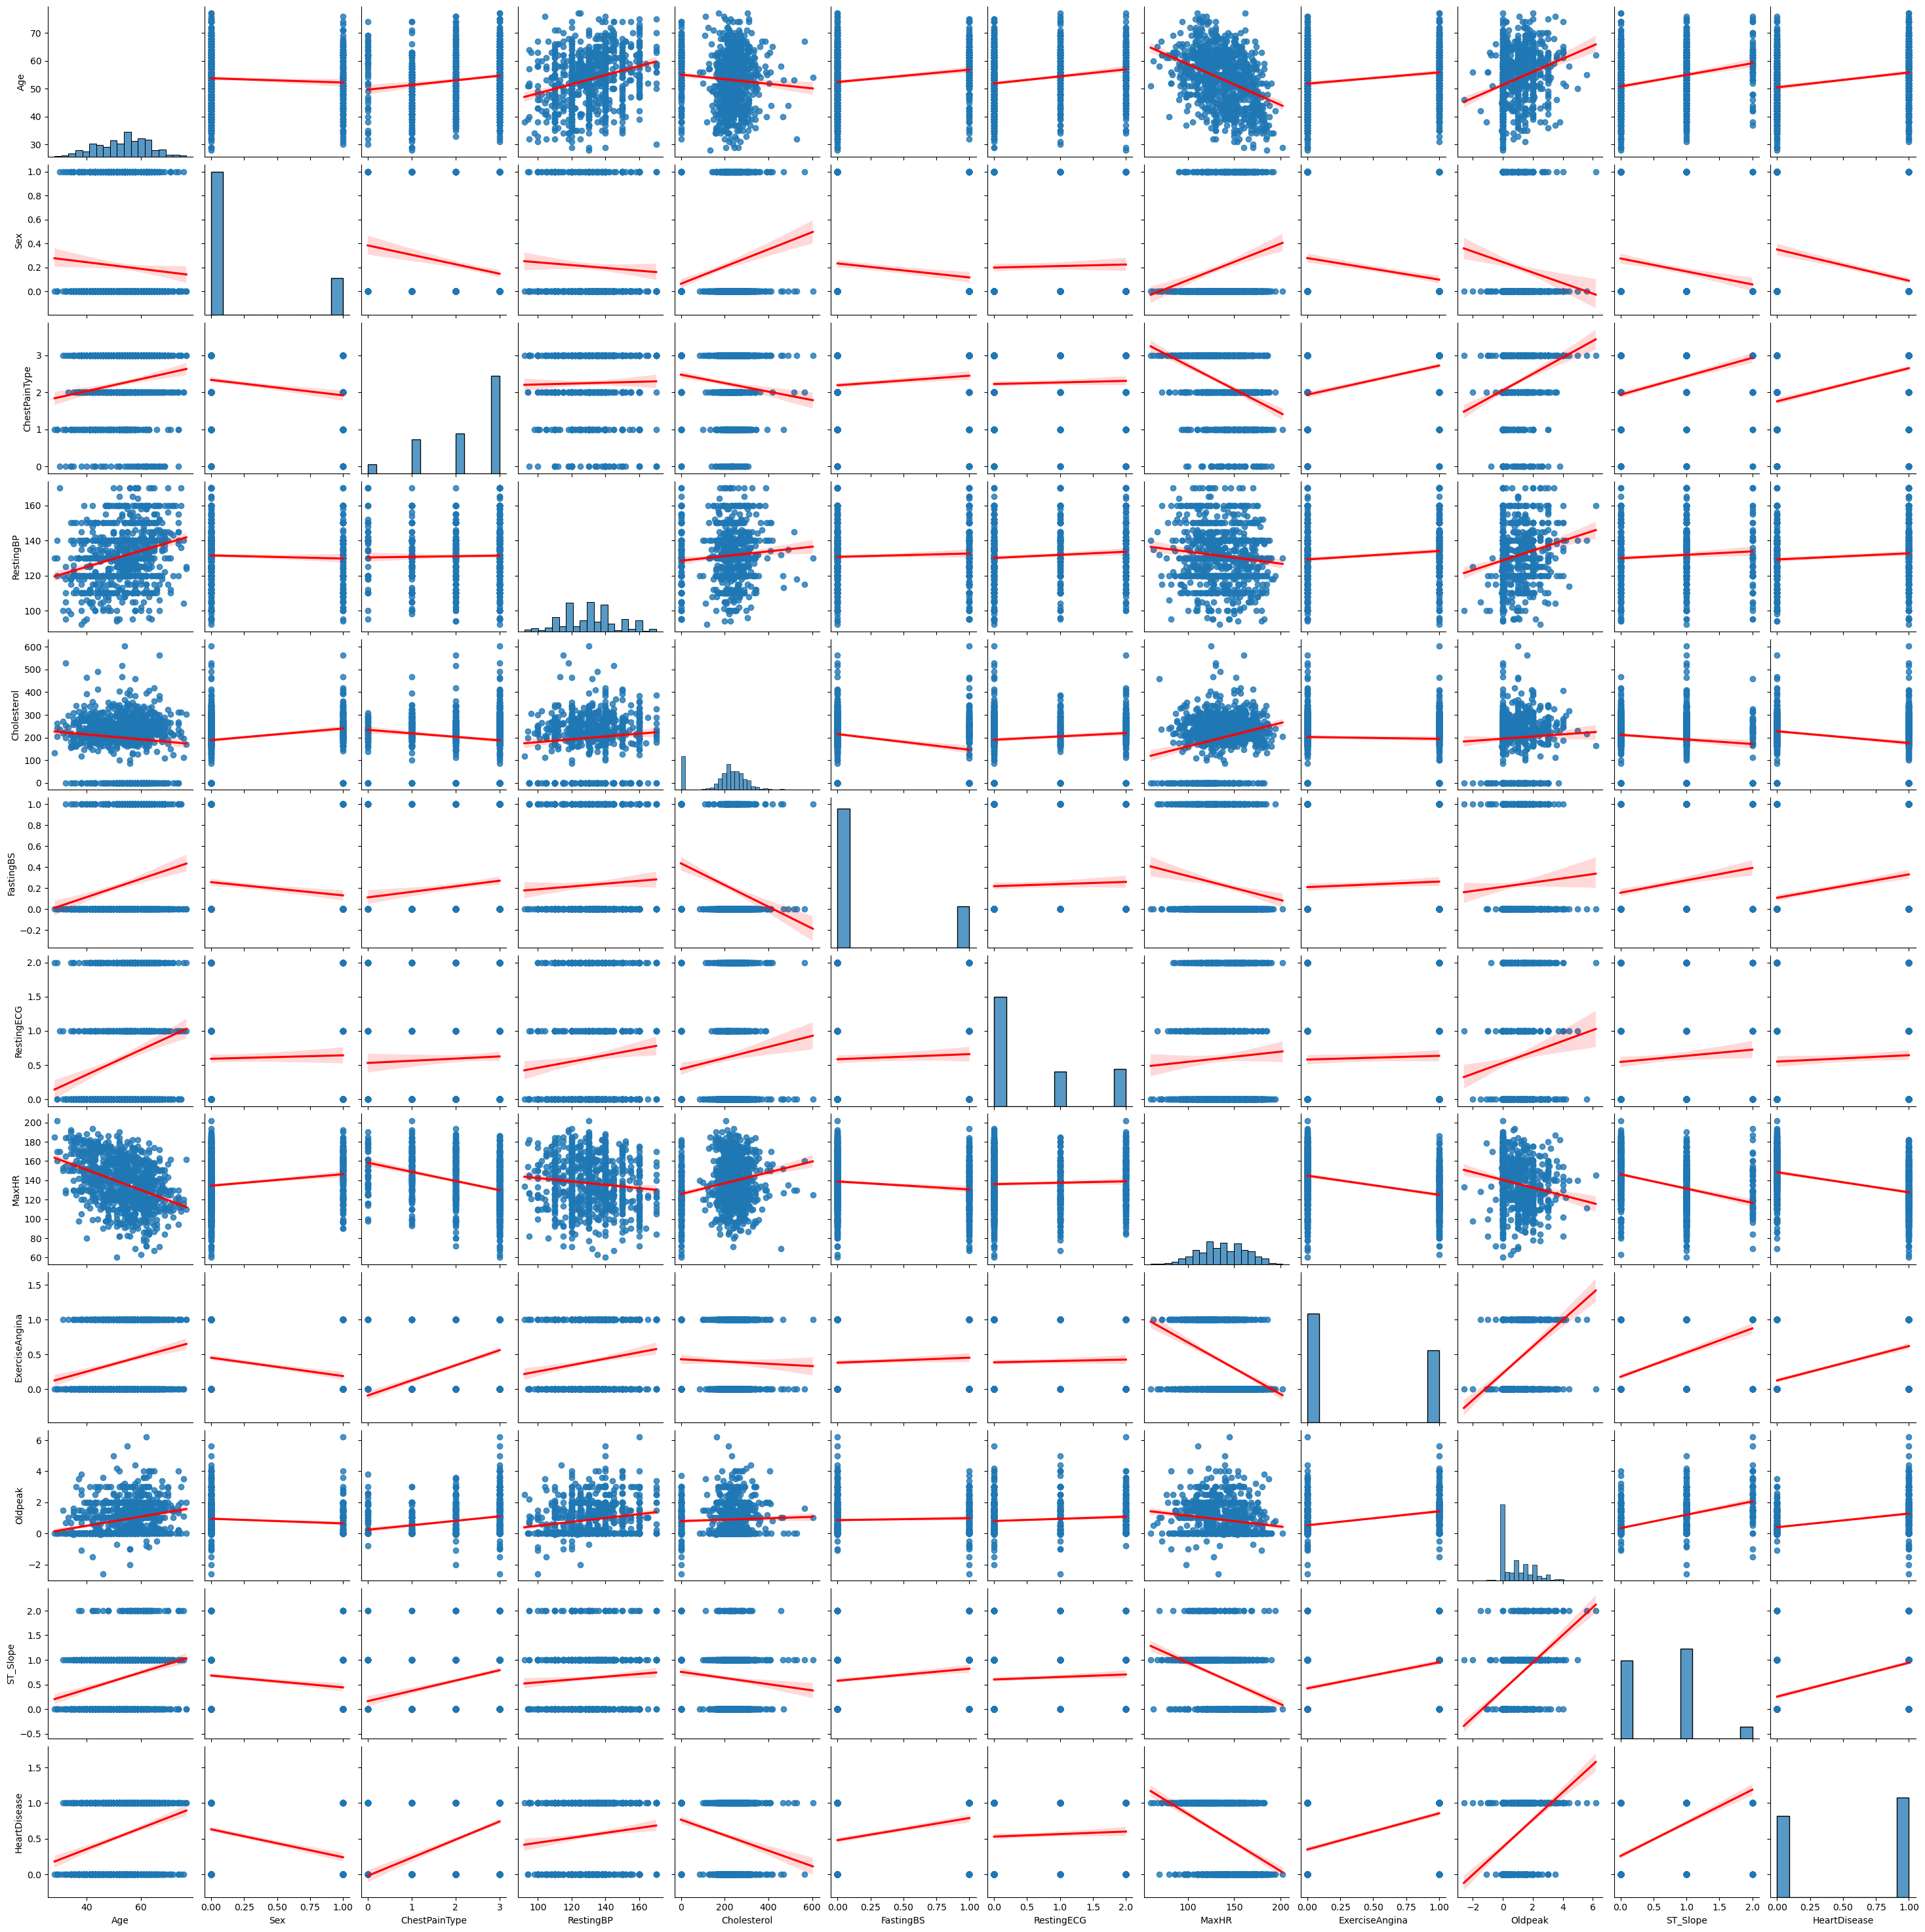

In [15]:
color = 'red'

plt.figure(figsize=(20, 10))

# 使用pairplot繪製迴歸線
sns.pairplot(df[['Age', 'Sex', 'ChestPainType','RestingBP',
                 'Cholesterol','FastingBS', 'RestingECG', 
                 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 
                 'HeartDisease']],
             kind="reg", plot_kws={'line_kws': {'color': color}})

plt.show()

觀察RestingBP那列可發現如同前面跑出來的熱度圖所示，只有age、cholesterol及oldpeak與其舉有較高的相關性，剩餘的例如:Sex、ChestPainType、FastingBS等皆為弱正相關或弱負相關，經判斷後決定先不將這些數值去除，如後續結果不理想再嘗試將負相關特徵去除看是否能提升表現

# 4.資料分割與建置4個分類模型(1. Logistic regression、2. SVM、3. Random forest、4. KNN)
### (1)將dataset以80:20(訓練集:測試集)的比例切割，並使用表格查看數據集(y)、訓練集(y_train)與測試集(y_test)的類別比例

In [41]:
from sklearn.model_selection import train_test_split

# 去除不需要的特徵
heartdf = df.drop(['RestingBP'],axis=1)
X = heartdf

dfColumsName = df.columns
y = df['RestingBP']

# 訓練集與測試集比例為80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=52)
# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat([y.value_counts(), 
                      y_train.value_counts(), 
                      y_test.value_counts()], axis=1)
df_count.columns = ['y', 'y_train', 'y_test']
df_count.head()

,y,y_train,y_test
RestingBP,,,
120,132,106.0,26.0
130,118,97.0,21.0
140,107,89.0,18.0
110,58,46.0,12.0
150,55,42.0,13.0


### (2)進行logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# 創建Logistic回歸模型
model = LogisticRegression()

# 在訓練集上訓練模型
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 評估模型性能
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          95       0.00      0.00      0.00         0
         100       0.00      0.00      0.00         8
         102       0.00      0.00      0.00         3
         105       0.00      0.00      0.00         3
         108       0.00      0.00      0.00         2
         110       0.00      0.00      0.00        12
         112       0.00      0.00      0.00         2
         115       0.00      0.00      0.00         5
         117       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         1
         120       0.17      0.73      0.28        26
         122       0.00      0.00      0.00         5
         124       0.00      0.00      0.00         4
         125       0.00      0.00      0.00         7
         126       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         5
         130       0.17      0.19      0.18        21
         132       0.00    

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

In [43]:
from sklearn.model_selection import cross_val_score

# 進行 k 次交叉驗證(default k=5)
cvs = cross_val_score(logit, X_test, y_test, scoring='accuracy')
print(cvs, '\n', cvs.mean())

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

[0.13888889 0.13888889 0.05555556 0.05714286 0.11428571] 
 0.10095238095238097


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 正規化:

In [45]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# 先做標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 創建Logistic回歸模型
model = LogisticRegression()

# 在訓練集上訓練模型
model.fit(X_train_scaled, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test_scaled)

# 評估模型性能
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          95       0.00      0.00      0.00         0
         100       0.00      0.00      0.00         8
         102       0.00      0.00      0.00         3
         105       0.00      0.00      0.00         3
         108       0.00      0.00      0.00         2
         110       0.25      0.08      0.12        12
         112       0.00      0.00      0.00         2
         114       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         5
         117       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         1
         120       0.21      0.46      0.29        26
         122       0.00      0.00      0.00         5
         124       0.00      0.00      0.00         4
         125       0.00      0.00      0.00         7
         126       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         5
         130       0.12    

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 